### <strong><font color=cornflowerblue>第三次作品：探討雙樣本 T 檢定的 T 值、P 值分佈與檢定力</font></strong>
學號：411078064

姓名：謝意盛
<hr>

### <strong><font color=lightseagreen>作品目標</font></strong>：

本作品探討通過雙樣本 T 檢定（Two Sample T-Test）所估計出的 T 值分佈是否與傳統 T 分配（T Distribution）的分佈情況相同。此外，也分別探討在給定兩組樣本數相同，且來自同一母體或不同母體的情況下，P 值分佈的情況，樣本數對其所造成的影響，以及雙樣本 T 檢定的檢定力。

<hr>

### <strong><font color=cornflowerblue>目標一</font></strong>：探討雙樣本 T 檢定所估計出的 T 值分佈是否與傳統 T 分配的分佈情況相同。

- 雙樣本 T 檢定（Two Sample T-Test）:
$$ H_0: \mu_1 = \mu_2 $$
$$ H_a: \mu_1 \neq \mu_2 $$

- 檢定統計量 T 值:
$$ t = \frac{\bar{x}_1-\bar{x}_2}{\sqrt{s_1^2/n_1 + s_2^2/n_2}}$$

- 理論分佈（變異數相等）:
$$X \sim T(N_1+N_2-2)$$

<strong><font color=indianred>說明</font></strong>：分別生成 100 筆和 200 筆來自 N(0, 1) 的樣本，進行雙樣本 T 檢定，生成 T 值，重複抽樣 1000 次，用生成的 1000 筆 T 值畫出其直方圖和 ECDF 圖，並另外畫出 T 分佈的 PDF 和 CDF，觀察由雙樣本 T 檢定生成的 T 值與真實 T 分配的分佈情況的關聯性。

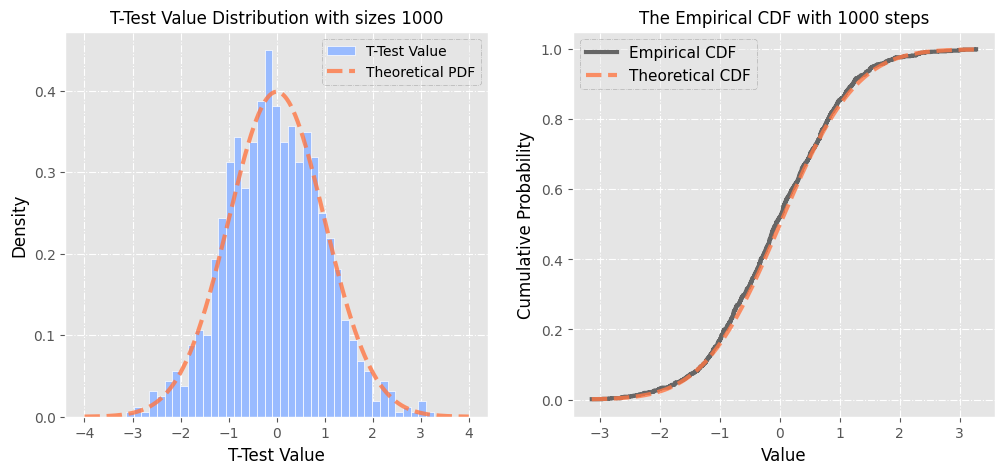

In [121]:
import numpy as np
from scipy import stats
from scipy.stats import norm, t, cumfreq
import matplotlib.pyplot as plt

# 生成樣本數
N1 = 100
N2 = 200
# 抽樣次數
M = 1000
# 參數設定
mu = 0
sigma = 1
T_Val = np.zeros([M, 1])

x1 = norm.rvs(loc = mu, scale = sigma, size = (N1, M))
x2 = norm.rvs(loc = mu, scale = sigma, size = (N2, M))
# 進行 t 檢定
results = stats.ttest_ind(x1, x2)
T_Val = results.statistic

# 計算 ECDF
res = cumfreq(T_Val, numbins = M)  # 生成 100 個區間的 ECDF
ecdf_x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
cumcountprob = res.cumcount / M  # 累積次數除以總樣本數量 = 累積機率

# T 分佈的 PDF
N_t = 1000
x_pdf = np.linspace(-4, 4, N_t)
y_pdf = t.pdf(x_pdf, N1 + N2 - 2)

# T 分佈的 CDF
x_cdf = np.linspace(ecdf_x.min(), ecdf_x.max(), N_t)
y_cdf = t.cdf(x_cdf, N1 + N2 - 2)

# 繪圖
plt.style.use('ggplot')
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# PDF
ax[0].hist(T_Val, bins = 40, density = True, color = '#99BBFF', edgecolor = '#FFFFFF', label = 'T-Test Value')
ax[0].plot(x_pdf, y_pdf, color = '#FF7744', lw = 3, linestyle = '--', label = 'Theoretical PDF', alpha = 0.8)
ax[0].set_title('T-Test Value Distribution with sizes {}'.format(M), fontsize = 12)
ax[0].set_xlabel('T-Test Value', fontsize = 12, color = 'black')
ax[0].set_ylabel('Density', fontsize = 12, color = 'black')
legend0 = ax[0].legend(edgecolor = '#666666')
legend0.get_frame().set_linestyle('-.')
legend0.get_frame().set_alpha(0.4)
ax[0].grid(True, linestyle = '-.')

# ECDF
ax[1].plot(ecdf_x, cumcountprob, drawstyle = 'steps-pre', label = 'Empirical CDF', color = '#666666', lw = 3)
ax[1].plot(x_cdf, y_cdf, color = '#FF7744', label = 'Theoretical CDF', alpha = 0.8, lw = 3, linestyle = '--')
ax[1].set_title('The Empirical CDF with {} steps'.format(M), fontsize = 12)
ax[1].set_xlabel('Value', fontsize = 12, color = 'black')
ax[1].set_ylabel('Cumulative Probability', fontsize = 12, color = 'black')
legend1 = ax[1].legend(edgecolor = '#666666', prop = {'size': 11})
legend1.get_frame().set_linestyle('-.')
legend1.get_frame().set_alpha(0.4)
ax[1].grid(True, linestyle = '-.')

plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：
實驗結果顯示進行 1000 次抽樣所生成的 T 值，其分佈情況確實有往中間集中的趨勢，但並沒有與 T 分配的 PDF 對應起來，ECDF 的情況也一樣，T 值的累積分佈沒有完全與真實的 CDF 分佈相吻合，還無法確定由雙樣本 T 檢定所生成的 T 值會服從 T 分配。

**<font color=lightseagreen>結論</font>**：
雖然上述結果不足夠證明雙樣本 T 檢定所生成的 T 值會服從 T 分配，但以上實驗的抽樣次數也只有 1000 次，有可能是實驗的抽樣次數還不夠多，因此再分別進行不同抽樣次數的實驗，觀察其所生成的 T 值分佈情況。

<hr>

<strong><font color=indianred>說明</font></strong>：與前一實驗相同，分別生成 100 筆和 200 筆來自 N(0, 1) 的樣本，進行雙樣本 T 檢定，生成 T 值，並分別重複抽樣 100，1000，10000，100000 次，用生成的 M 筆 T 值畫出其直方圖和 ECDF 圖，並另外畫出 T 分佈的 PDF 和 CDF，觀察由雙樣本 T 檢定生成的 T 值與真實 T 分配的分佈情況與抽樣次數的關係。

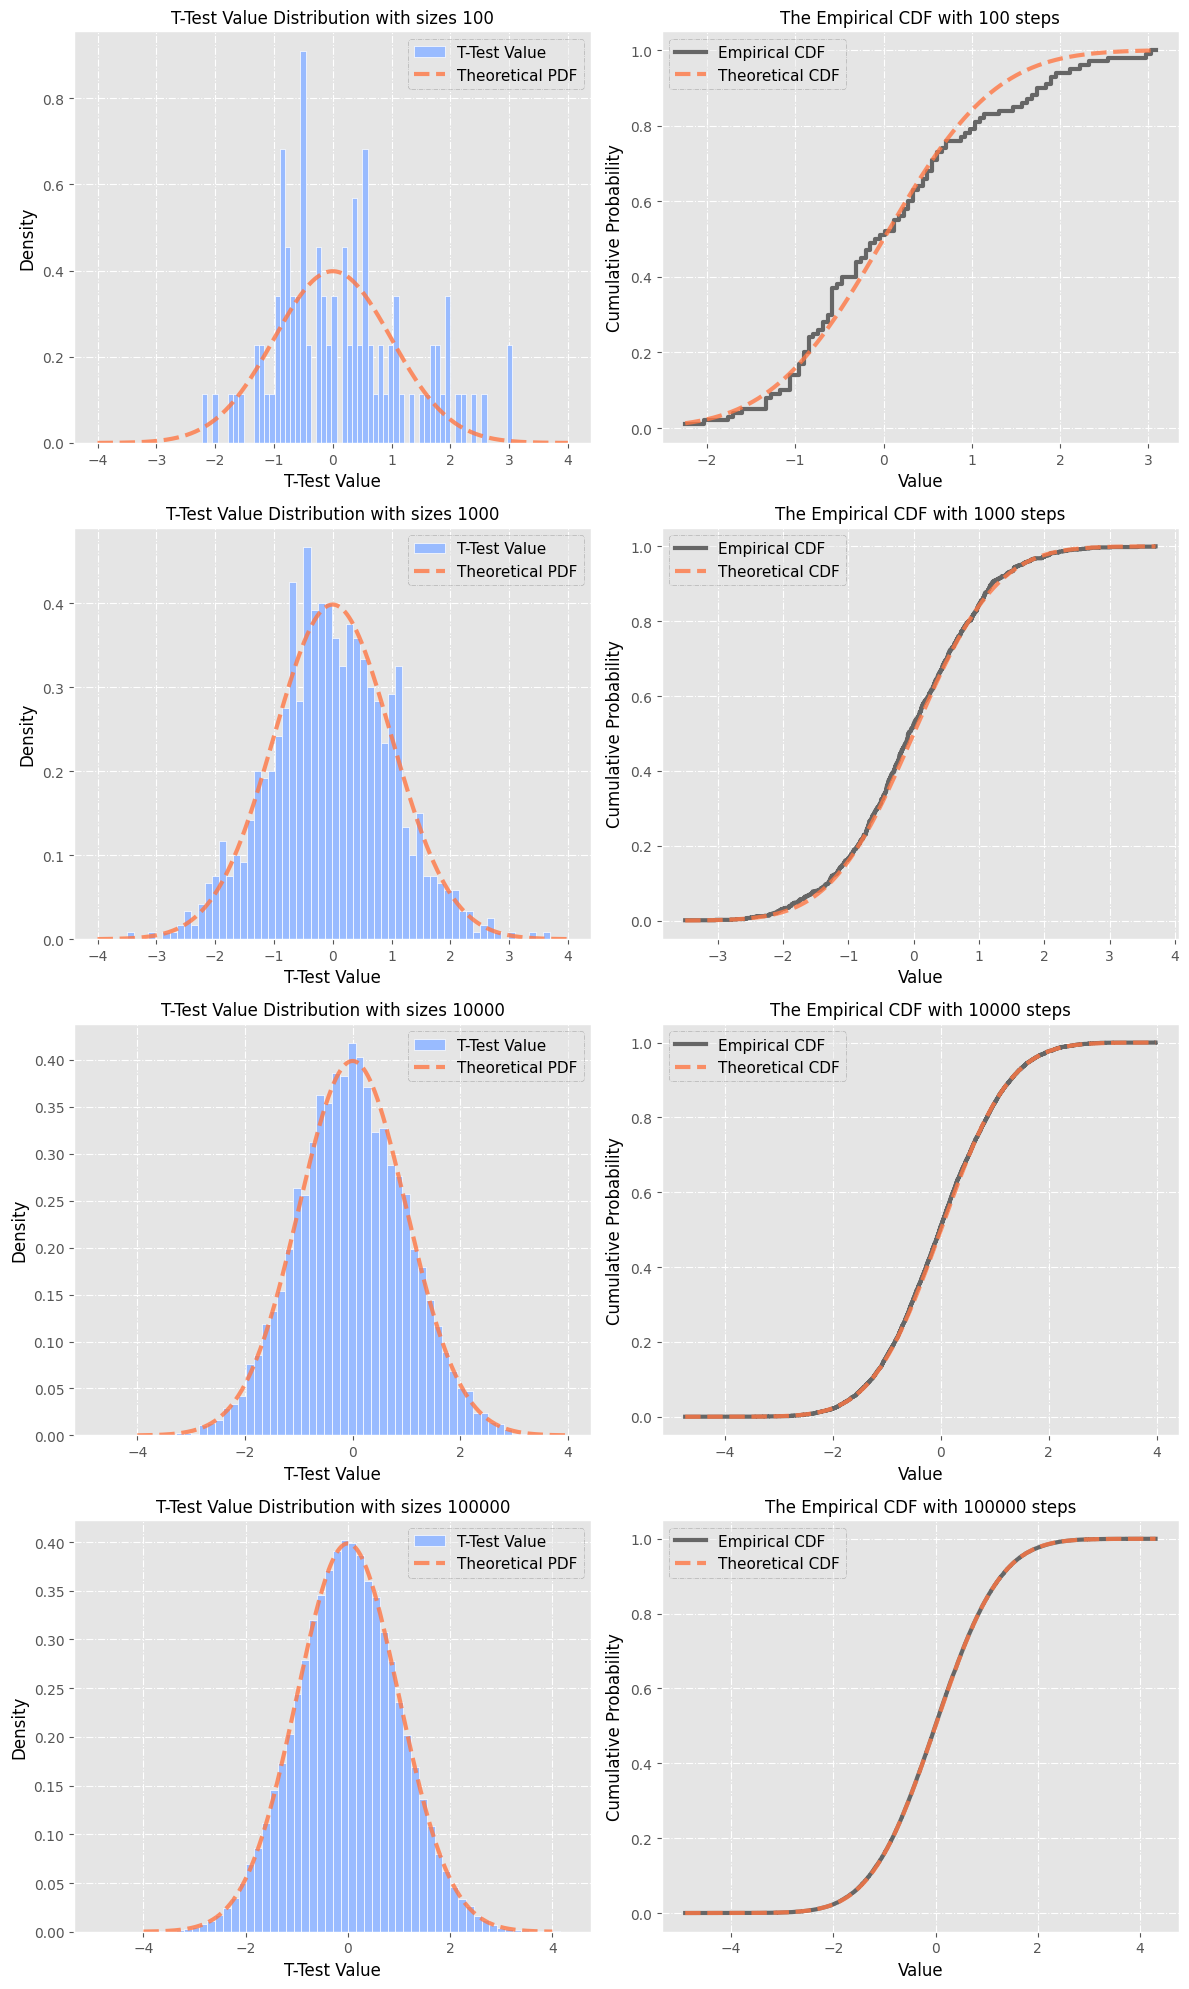

In [ ]:
import numpy as np
from scipy import stats
from scipy.stats import norm, t, cumfreq
import matplotlib.pyplot as plt

# 生成樣本數
N1 = 100
N2 = 200
# 抽樣次數
M_values = [100, 1000, 10000, 100000]
# 參數設定
mu = 0
sigma = 1

# 繪圖
plt.style.use('ggplot')
fig, axs = plt.subplots(4, 2, figsize = (12, 20))

for j, M in enumerate(M_values):
    T_Val = np.zeros([M, 1])
    x1 = norm.rvs(loc = mu, scale = sigma, size = (N1, M))
    x2 = norm.rvs(loc = mu, scale = sigma, size = (N2, M))
    # 進行 t 檢定
    results = stats.ttest_ind(x1, x2)
    T_Val = results[0]

    # 計算 ECDF
    res = cumfreq(T_Val, numbins = M)  # 生成 100 個區間的 ECDF
    ecdf_x = res.lowerlimit + np.linspace(0, res.binsize * res.cumcount.size, res.cumcount.size)
    cumcountprob = res.cumcount / M  # 累積次數除以總樣本數量 = 累積機率

    # T 分佈的 PDF
    N_t = 1000
    x_pdf = np.linspace(-4, 4, N_t)
    y_pdf = t.pdf(x_pdf, N1 + N2 - 2)

    # T 分佈的 CDF
    x_cdf = np.linspace(ecdf_x.min(), ecdf_x.max(), N_t)
    y_cdf = t.cdf(x_cdf, N1 + N2 - 2)

    # 繪製 PDF 和 ECDF
    ax_pdf = axs[j, 0]
    ax_cdf = axs[j, 1]

    # PDF
    ax_pdf.hist(T_Val, bins = 60, density = True, color = '#99BBFF', edgecolor = '#FFFFFF'
                , label = 'T-Test Value')
    ax_pdf.plot(x_pdf, y_pdf, color = '#FF7744', lw = 3, linestyle = '--', label = 'Theoretical PDF'
                , alpha = 0.8)
    ax_pdf.set_title('T-Test Value Distribution with sizes {}'.format(M), fontsize = 12)
    ax_pdf.set_xlabel('T-Test Value', fontsize = 12, color = 'black')
    ax_pdf.set_ylabel('Density', fontsize = 12, color = 'black')
    legend0 = ax_pdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend0.get_frame().set_linestyle('-.')
    legend0.get_frame().set_alpha(0.4)
    ax_pdf.grid(True, linestyle = '-.')

    # ECDF
    ax_cdf.plot(ecdf_x, cumcountprob, drawstyle = 'steps-pre', label = 'Empirical CDF'
                , color = '#666666', lw = 3)
    ax_cdf.plot(x_cdf, y_cdf, color = '#FF7744', label = 'Theoretical CDF', alpha = 0.8, lw = 3
                , linestyle = '--')
    ax_cdf.set_title('The Empirical CDF with {} steps'.format(M), fontsize = 12)
    ax_cdf.set_xlabel('Value', fontsize = 12, color = 'black')
    ax_cdf.set_ylabel('Cumulative Probability', fontsize = 12, color = 'black')
    legend1 = ax_cdf.legend(edgecolor = '#666666', prop = {'size': 11})
    legend1.get_frame().set_linestyle('-.')
    legend1.get_frame().set_alpha(0.4)
    ax_cdf.grid(True, linestyle = '-.')

plt.tight_layout()
plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：
實驗結果顯示分別重複抽樣 100，1000，10000，100000 次，並進行雙樣本 T 檢定所生成的 T 值，其分佈情況確實隨著抽樣次數越多，越接近真實 T 分配的分佈模樣，尤其在重複抽樣 10000 次時就已經無限接近真實的 T 分配的分佈情況，證實了由雙樣本 T 檢定所生成的 T 值確實服從 T 分配。

**<font color=lightseagreen>結論</font>**：
上述實驗結果證實了雙樣本 T 檢定所生成的 T 值在抽樣次數多時確實會服從 T 分配，大致抽樣 10000 筆 T 值就可觀察到此現象。

<hr>

### <strong><font color=cornflowerblue>目標二</font></strong>：探討在兩組樣本數相同，且來自同一母體或不同母體的情況下，雙樣本 T 檢定所估計出的 P 值分佈情況。

<strong><font color=indianred>說明</font></strong>：分別生成 10 筆、30 筆和 100 筆各兩組來自 N(0, 1) 的樣本，進行雙樣本 T 檢定，生成 P 值，重複抽樣 100000 次，用生成的 100000 筆 P 值畫出其直方圖，觀察其分佈情況。

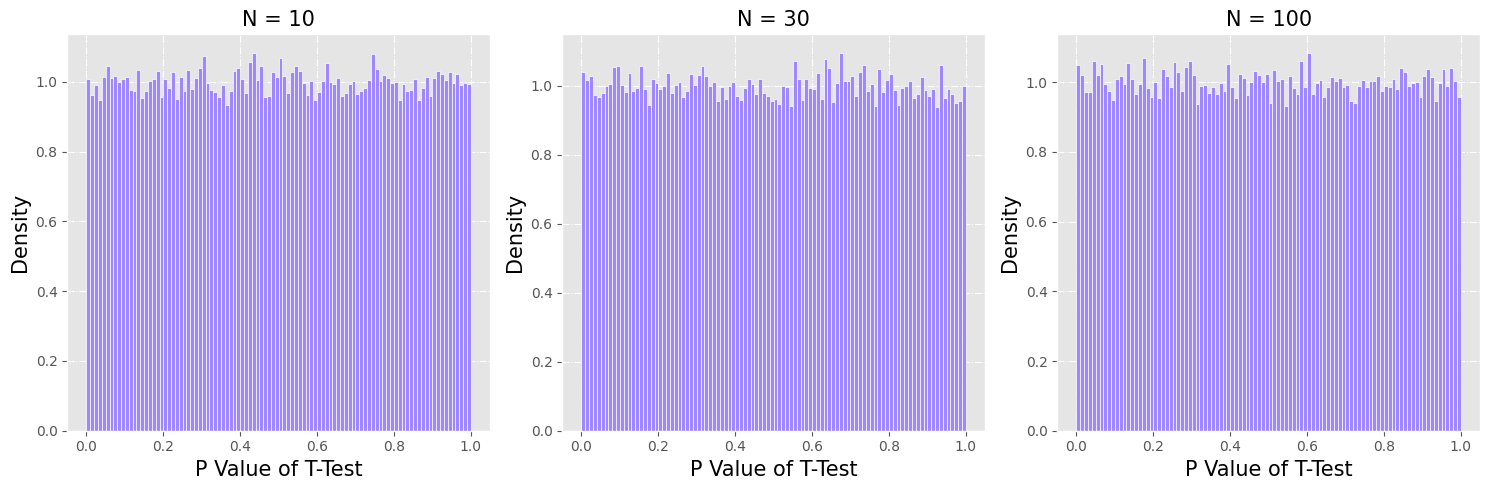

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt

# 樣本數
N_values = [10, 30, 100]
# 抽樣次數
M = 100000
# 設定常態分佈的參數
mu = 0
sigma = 1

def P_Val_Dist(N):
    P_Val = np.zeros([M, 1])
    x1 = norm.rvs(loc = mu, scale = sigma, size = (N, M))
    x2 = norm.rvs(loc = mu, scale = sigma, size = (N, M))
    # 進行 t 檢定
    results = stats.ttest_ind(x1, x2)
    P_Val = results[1]
    return P_Val

plt.style.use('ggplot')
fig, ax = plt.subplots(1, 3, figsize = (15, 5))

for i in range(3):
    ax[i].hist(P_Val_Dist(N_values[i]), bins = 100, density = True, color = '#9F88FF', edgecolor = '#FFFFFF')
    ax[i].set_title('N = {}'.format(N_values[i]), fontsize = 15)
    ax[i].grid(True, linestyle = '-.')
    ax[i].grid(True, linestyle = '-.')
    ax[i].set_xlabel('P Value of T-Test', fontsize = 15, color = 'black')
    ax[i].set_ylabel('Density', fontsize = 15, color = 'black')

plt.tight_layout()
plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：
實驗結果顯示兩組來自同一母體，且樣本數相同的資料重複抽樣 100000 次，進行雙樣本 T 檢定所生成的 P 值分佈情況，可見無論是樣本數 N = 10，30，100，它們的 P 值分佈並沒有明顯的不同，而且它們的分佈都大致呈現出了均勻分佈的模樣。

**<font color=lightseagreen>結論</font>**：
當兩組樣本來自同一母體，且樣本數相同時，重複進行 100000 次，進行雙樣本 T 檢定所生成的 P 值分佈會無限接近均勻分佈，且無論是樣本數 N = 10，30，100，其分佈長相都沒有太大差別，但上述實驗並未探討到關於抽樣次數 M 與 P 值分佈的關係，是否是因為抽樣次數太多，才會導致分佈長相接近均勻分佈，以及分佈長相並不因為樣本數的不同而有差異。因此接下來的實驗將針對這部分進行。

<hr>

<strong><font color=indianred>說明</font></strong>：與前一實驗相同，分別生成 10 筆、30 筆和 100 筆各兩組來自 N(0, 1) 的樣本，進行雙樣本 T 檢定，生成 P 值，並分別重複抽樣 1000、10000、100000 次，用生成的 M 筆 P 值畫出直方圖，觀察其分佈情況與抽樣次數的關係。

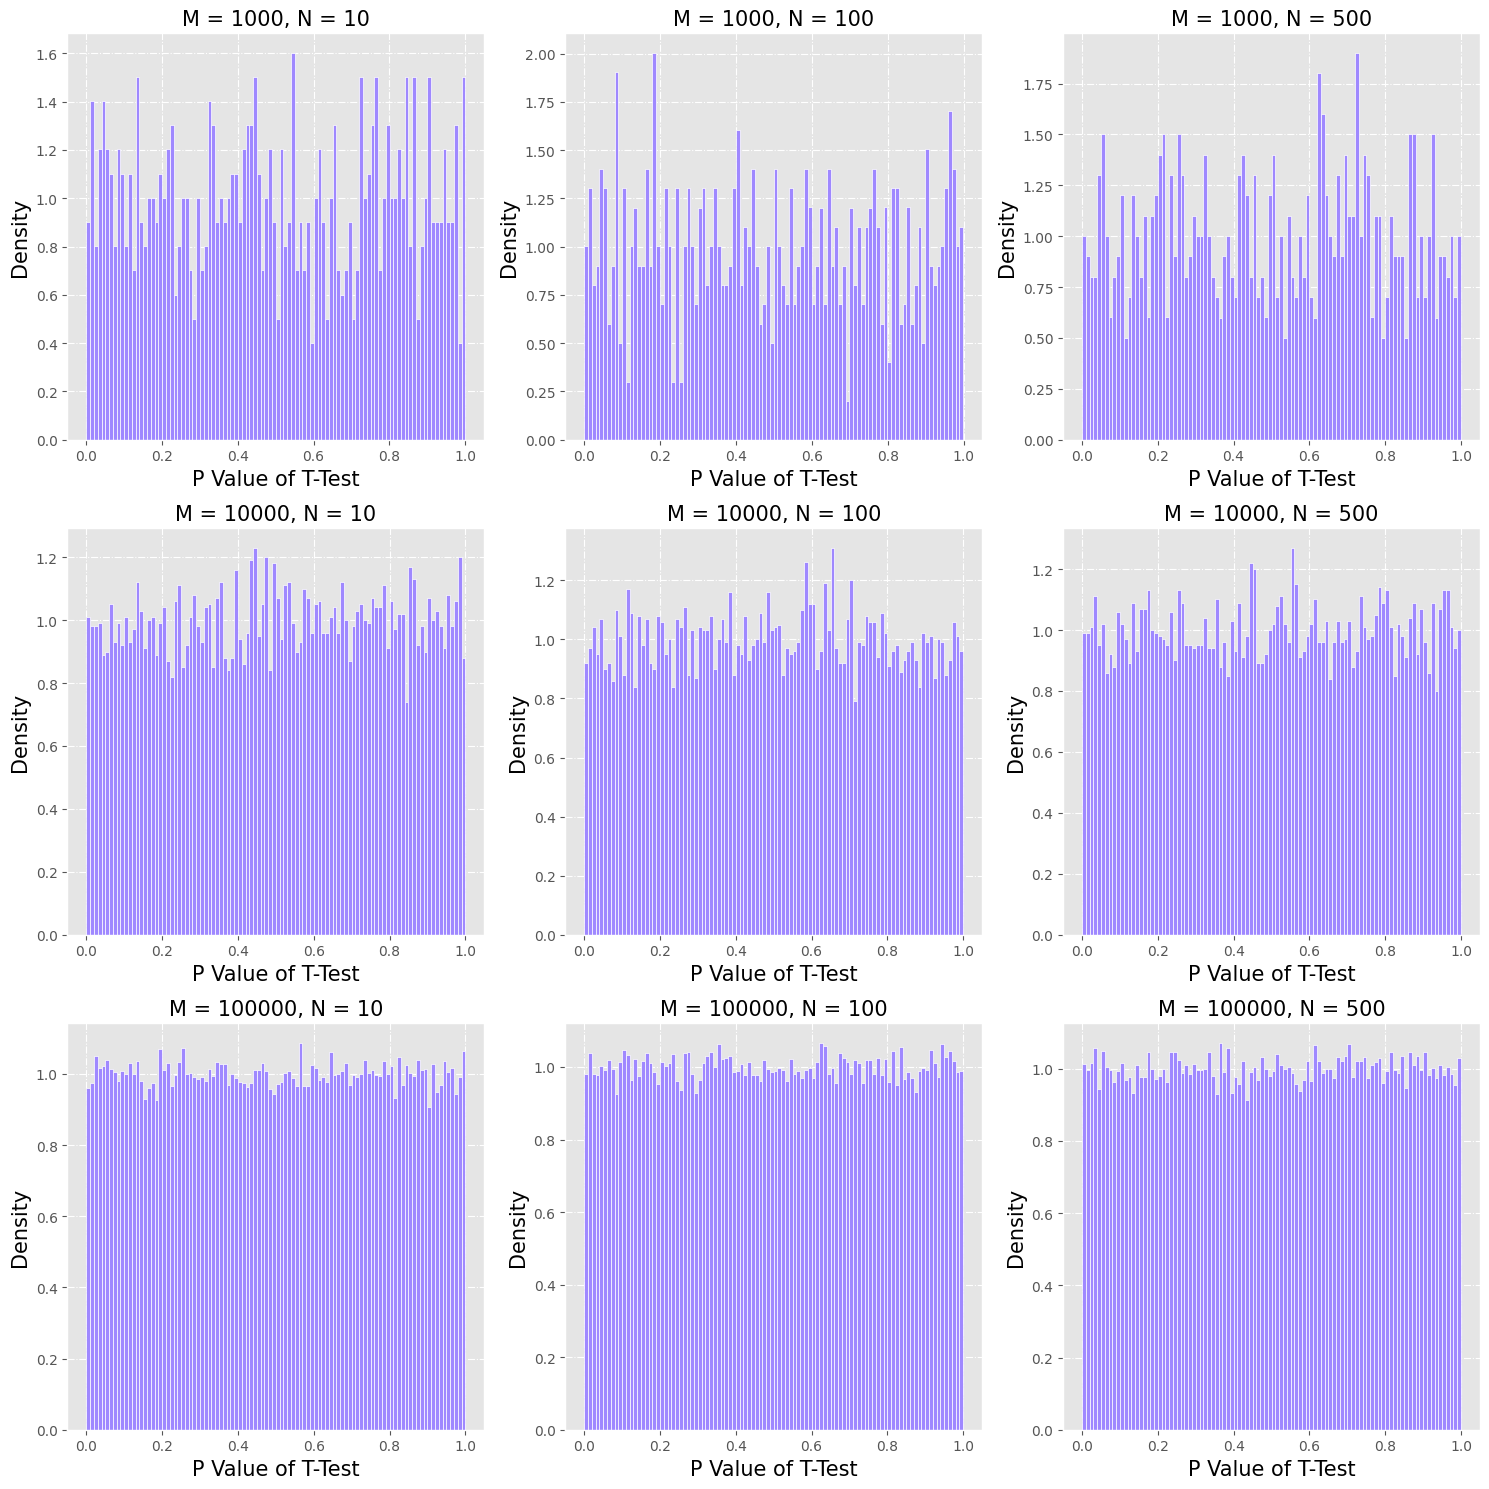

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt

# 樣本數
N_values = [10, 100, 500]
# 抽樣次數
M_values = [1000, 10000, 100000]
# 設定常態分佈的參數
mu = 0
sigma = 1

def P_Val_Dist(N, M):
    P_Val = np.zeros([M, 1])
    x1 = norm.rvs(loc = mu, scale = sigma, size = (N, M))
    x2 = norm.rvs(loc = mu, scale = sigma, size = (N, M))
    # 進行 t 檢定
    results = stats.ttest_ind(x1, x2)
    P_Val = results[1]
    return P_Val

plt.style.use('ggplot')
fig, ax = plt.subplots(3, 3, figsize = (15, 15))

for j, M in enumerate(M_values):
    for i, N in enumerate(N_values):
        ax[j, i].hist(P_Val_Dist(N, M), bins = 100, density = True, color = '#9F88FF', edgecolor = '#FFFFFF')
        ax[j, i].set_title('M = {}, N = {}'.format(M, N), fontsize = 15)
        ax[j, i].grid(True, linestyle = '-.')
        ax[j, i].set_xlabel('P Value of T-Test', fontsize = 15, color = 'black')
        ax[j, i].set_ylabel('Density', fontsize = 15, color = 'black')

plt.tight_layout()
plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：
前面實驗分別提出了兩個問題，分別為是否由於抽樣次數太多使得分佈近似於均勻分佈，以及樣本數是否也會影響分佈模樣。實驗結果顯示當抽樣次數相同時，樣本數的不同並不影響分佈長相，但是可明顯看見隨著抽樣次數的增加，P 值分佈會越接近均勻分佈的模樣，尤其當抽樣次數為 100000 次時，P 值分佈已十分接近均勻分佈。

**<font color=lightseagreen>結論</font>**：
當兩組樣本來自同一母體，且樣本數相同時，不論樣本數的多寡，重複抽樣所生成 P 值的次數越多，其分佈模樣會越接近均勻分佈。

<hr>

<strong><font color=indianred>說明</font></strong>：生成兩組抽樣次數分別為 10 筆、30 筆和 100 筆的資料，其中一組來自 N(0, 1)，另一組分別來自 N(0.5, 1)，N(1, 1) 以及 N(2, 1)，將相同樣本數但來自不同母體分配的資料個別進行雙樣本 T 檢定，生成 P 值，重複抽樣 100000 次，用生成的 100000 筆 P 值畫出其直方圖，觀察其分佈情況。

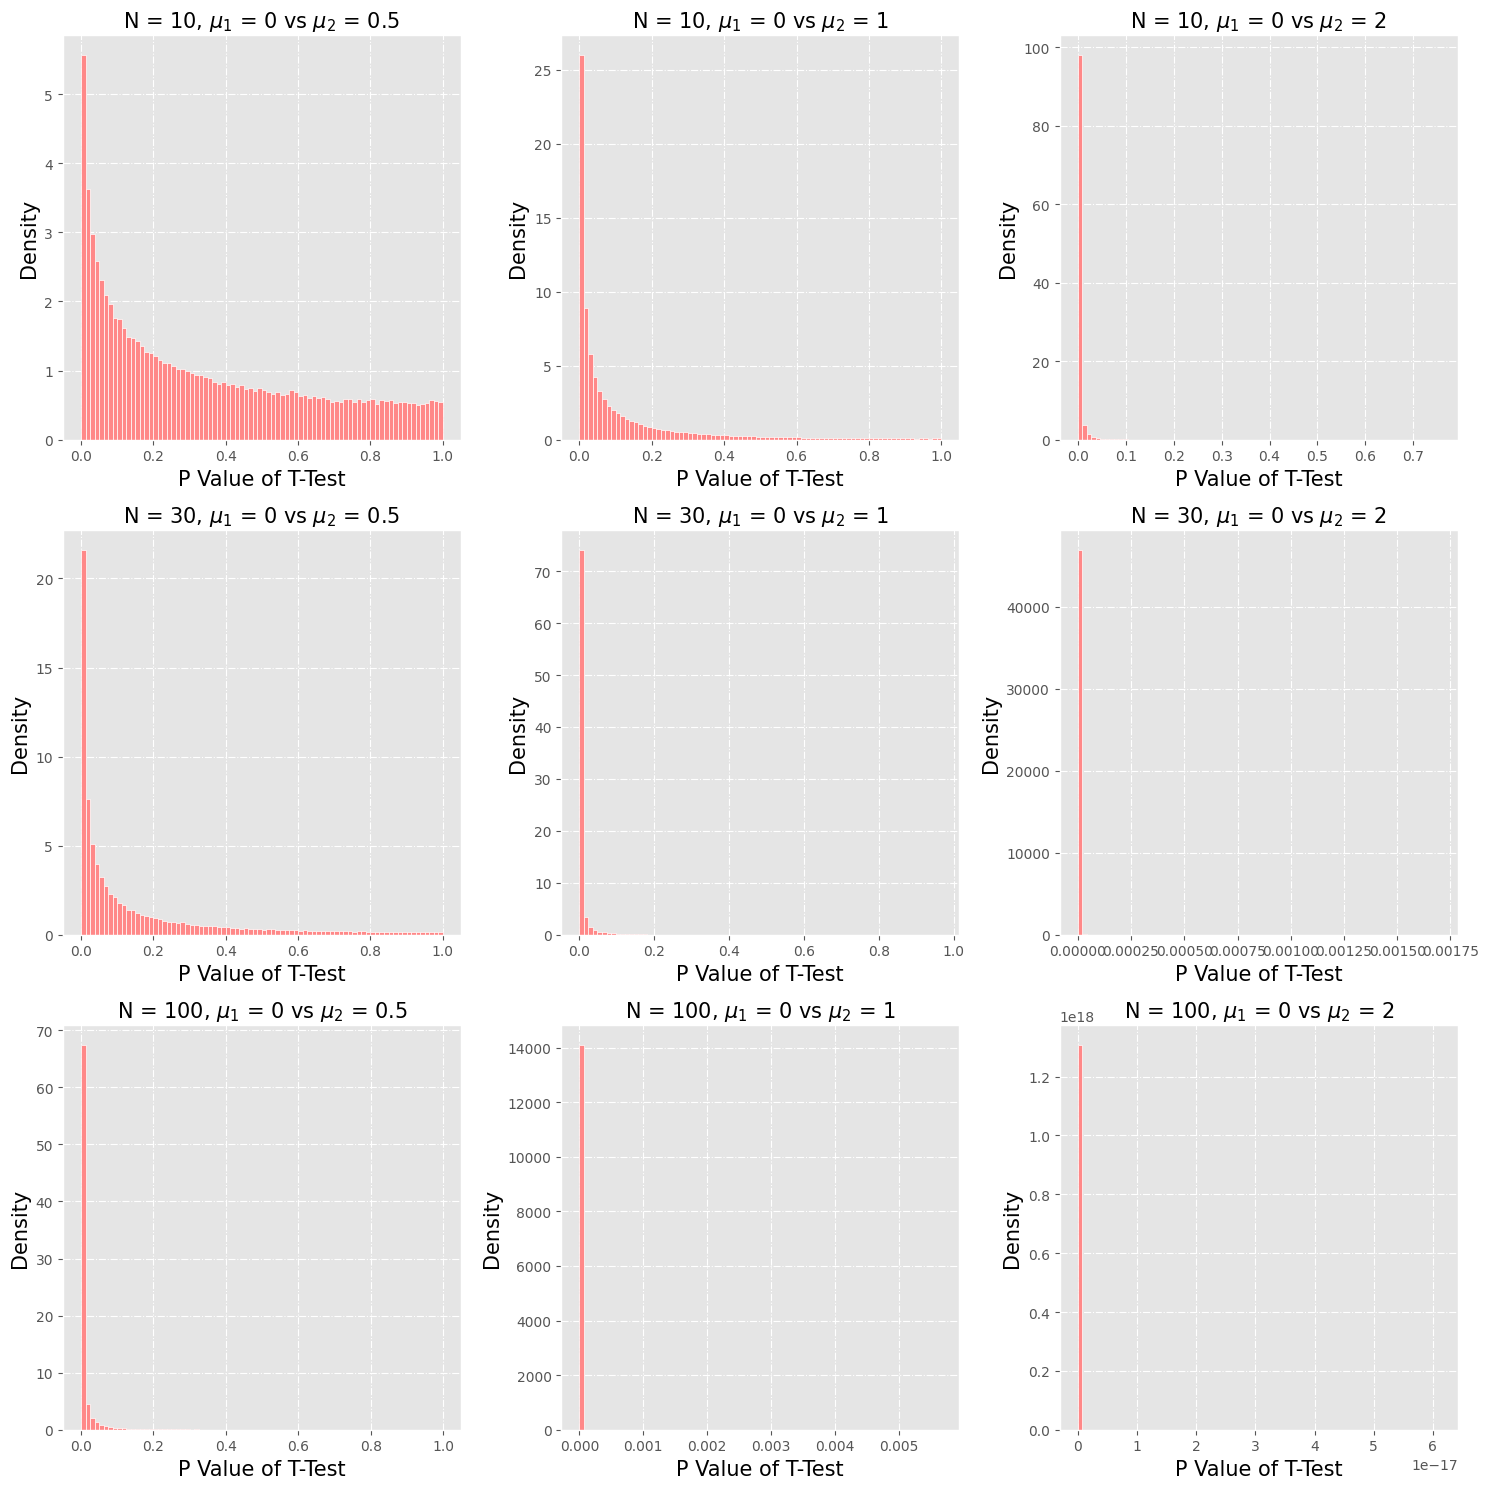

In [ ]:
import numpy as np
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt

# 樣本數
N_values = [10, 30, 100]
# 抽樣次數
M = 100000
# 設定常態分佈的參數
mu1 = 0
mu2_values = [0.5, 1, 2]
sigma = 1

def P_Val_Dist(N, mu2):
    P_Val = np.zeros([M, 1])
    x1 = norm.rvs(loc = mu1, scale = sigma, size = (N, M))
    x2 = norm.rvs(loc = mu2, scale = sigma, size = (N, M))
    # 進行 t 檢定
    results = stats.ttest_ind(x1, x2)
    P_Val = results[1]
    return P_Val

plt.style.use('ggplot')
fig, ax = plt.subplots(3, 3, figsize = (15, 15))

for j, N in enumerate(N_values):
    for i, mu2 in enumerate(mu2_values):
        ax[j, i].hist(P_Val_Dist(N, mu2), bins = 80, density = True, color = '#FF8888', edgecolor = '#FFFFFF')
        ax[j, i].set_title('N = {}, $\mu_1$ = 0 vs $\mu_2$ = {}'.format(N, mu2), fontsize = 15)
        ax[j, i].set_xlabel('P Value of T-Test', color = 'black', fontsize = 15)
        ax[j, i].set_ylabel('Density', color = 'black', fontsize = 15)
        ax[j, i].grid(True, linestyle = '-.')

plt.tight_layout()
plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：
實驗結果顯示兩組來自不同母體分配，但樣本數相同的資料重複抽樣 100000 次，進行雙樣本 T 檢定所生成的 P 值分佈情況，可見當資料來自不同的母體分配時，P 值分佈會呈現右偏的趨勢，且隨著 $\mu_2$ 的值增加，其趨勢會右偏得越嚴重，大部分的 P 值都落在 0 附近。此外，本次實驗也發現樣本數不同於先前實驗的表現，隨著樣本數越大，P 值分佈右偏的趨勢會越嚴重，表示樣本數的大小會影響檢定力。

**<font color=lightseagreen>結論</font>**：
當兩組樣本來自不同的母體分配，但樣本數相同時，進行雙樣本 T 檢定所生成的 P 值分佈會呈現右偏的模樣，且同時隨著樣本數和抽樣次數的增加而顯得更加右偏。原因在於雙樣本 T 檢定的預設 Type I Error 是 $\alpha = 0.05$，因此當樣本來自不同母體時，其拒絕 $H_0$ 的機率是 0.95，表示會有 95% 的 P 值會 < 0.05，故就會呈現出實驗結果的模樣，且隨著樣本數越大或是母體差異太大，其檢定力就會越強。後續實驗將更詳細地去探討雙樣本 T 檢定的檢定力（Power）。

<hr>

### <strong><font color=cornflowerblue>目標三</font></strong>：探討在給定樣本來自於同一母體或不同母體的情況下，雙樣本 T 檢定的檢定力（Power）。

- 雙樣本 T 檢定（Two Sample T-Test）:
$$ H_0: \mu_1 = \mu_2 $$
$$ H_a: \mu_1 \neq \mu_2 $$

- Power:
$$P(Reject\; H_0 | Data \sim H_a) = 0.95$$

- Type I Error:
$$P(Reject\; H_0 | Data \sim H_0) = 0.05$$

<strong><font color=indianred>說明</font></strong>：生成兩組樣本數同為 100 筆，但分別來自 N(0, 1) 和 N(0.5, 1) 的樣本，進行雙樣本 T 檢定，重複抽樣 1000 次，生成 1000 筆 P 值，接著將小於 0.05 的 P 值取平均，估計出檢定統計量 Power。

In [150]:
from scipy.stats import norm
from scipy import stats
import numpy as np

# 樣本數
N = 100
# 抽樣次數
M = 1000
# 參數設定
mu1 = 0
mu2 = 0.5
sigma = 1
P_Val = np.zeros([M, 1])
alpha = 0.05
# 生成樣本
x1 = norm.rvs(loc = mu1, scale = sigma, size = (N, M))
x2 = norm.rvs(loc = mu2, scale = sigma, size = (N, M))
# 進行 t 檢定
results = stats.ttest_ind(x1, x2, equal_var = True)
P_Val = results[1]
# power
power = np.mean(P_Val < alpha)
print('Power = {}'.format(power))

Power = 0.939


#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：
實驗結果顯示在給定兩組樣本數同樣為 100 筆，但來自不同母體分配的情況下，雙樣本 T 檢定的 Power 落在 0.95 附近，結合前一個實驗的第七張子圖，表示有將近 95% 的 P 值 < 0.05。

**<font color=lightseagreen>結論</font>**：
已知兩組樣本來自不同的母體分配，故理論上在給定 $\alpha = 0.05$ 下，實驗的檢定結果要 Reject $H_0$，且拒絕的機率（Power）要達到 95%，而從實驗結果得知，當樣本數為 100 筆時，Power 確實落在 0.95 附近，表示此檢定統計量的檢定力很強，但還需要確認樣本數對於檢定力的影響，故接下來將針對此部分進行實驗。

<hr>

<strong><font color=indianred>說明</font></strong>：生成四組樣本數分別為 10、20、30、50、100、300、500 筆，且分別來自同一母體 N(0, 1) 以及來自不同母體 N(0, 1) 和 N(0.5, 1) 的樣本，進行雙樣本 T 檢定，重複抽樣 1000 次，生成 1000 筆 P 值，接著將小於 0.05 的 P 值取平均，估計出檢定統計量 Power，觀察樣本數對於 Power 的影響。

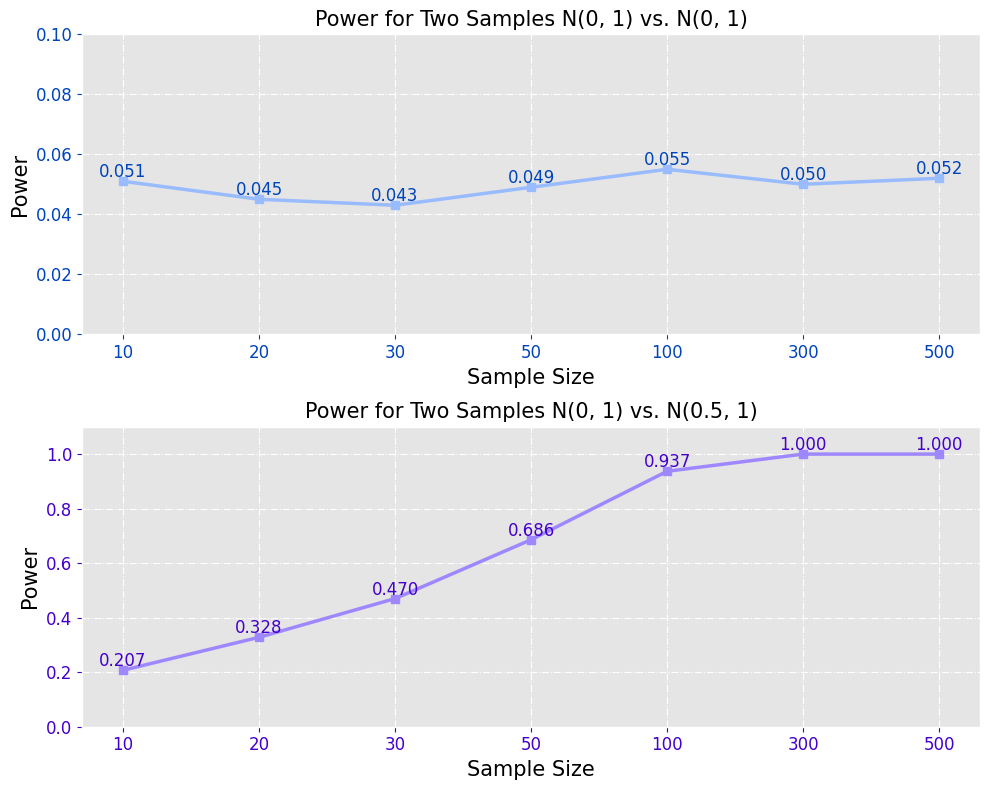

In [7]:
from scipy.stats import norm
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

# 樣本數
N_values = [10, 20, 30, 50, 100, 300, 500]
# 抽樣次數
M = 1000
# 參數設定
mu1 = 0
mu2_values = [0, 0.5]
sigma = 1
alpha = 0.05

# 繪圖
plt.style.use('ggplot')
fig, ax = plt.subplots(2, 1, figsize = (10, 8))
colors = ['#99BBFF', '#9F88FF', '#0044BB', '#4400CC']

for i, (mu2, col) in enumerate(zip(mu2_values, colors)):
    power = np.zeros(len(N_values))
    for j, N in enumerate(N_values):
        x1 = norm.rvs(loc = mu1, scale = sigma, size = (N, M))
        x2 = norm.rvs(loc = mu2, scale = sigma, size = (N, M))
        # 進行 t 檢定
        results = stats.ttest_ind(x1, x2)
        P_Val = results[1]
        
        power[j] = np.mean(P_Val < alpha)

    # 繪製 Power 圖
    ax[i].plot(power, marker = 's', linestyle = '-', color = col, lw = 2.5)
    ax[i].set_xticks(np.arange(len(N_values)))
    ax[i].set_xticklabels(N_values)
    ax[i].grid(True, linestyle = '-.')
    ax[i].set_xlabel('Sample Size', color = 'black', fontsize = 15)
    ax[i].set_ylabel('Power', color = 'black', fontsize = 15)
    ax[i].set_title('Power for Two Samples N({}, {}) vs. N({}, {})'
                       .format(mu1, sigma, mu2, sigma), color = 'black', fontsize = 15)
    ax[i].tick_params(axis = 'both', colors = colors[i + 2], labelsize = 12)
    if mu1 == mu2:
        ax[i].set_ylim([0, 0.1])
    else:
        ax[i].set_ylim([0, 1.1])
    for k in range(len(N_values)):
        ax[i].text(k, power[k], '{:.3f}'.format(power[k]),
                   fontsize = 12, color = colors[i + 2], ha = 'center', va = 'bottom')

plt.tight_layout()
plt.show()

#### **<font color=cornflowerblue>注意事項與討論：</font>**

**<font color=lightseagreen>觀察</font>**：
實驗結果顯示當樣本來自同一母體時，無論樣本數多寡，其 Power 都落於 0.05 附近，表示有 5% 的 P 值 < 0.05，這與先前的實驗結果吻合，來自同一母體的樣本經過雙樣本 T 檢定，其 P 值分佈會是均勻分佈，故會有 5% 的 P 值會被錯誤拒絕（p < 0.05），證實雙樣本 T 檢定的 Type I error 為 0.05，可見它對於 Type I Error 控制得不錯。
此外，當樣本來自不同母體時，隨著樣本數增加，其 Power 會越來越強，直到樣本數為 100 筆以上時，其 Power 會是 1，表示樣本數的增加確實會提高雙樣本 T 檢定的 Power，且在母體分佈差距不大的情況下，當樣本數提高到 300 以後，依然可準確拒絕 $H_0$，表示其檢定力很強。

**<font color=lightseagreen>結論</font>**：
實驗結果證實雙樣本 T 檢定在大樣本的情況下，Power 會很強，可以準確拒絕 $H_0$，且 Type I Error 可準確控制在 0.05 左右，表示雙樣本 T 檢定是一個很好的檢定統計量.

<hr>